In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from datetime import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pickle.load(open("df.pkl", 'rb'))

In [5]:
df.shape

(1266986, 35)

In [6]:
def get_bedrooms(housing):
    """parse amount of bedrooms from 'housing' field"""
    bedrooms = None
    # bedrooms
    match = re.search(r'(\d+)br.*', housing)
    if match:
        bedrooms = int(match.group(1))
    return bedrooms

In [7]:
df.dropna(subset=['parsed_price', "parsed_housing"], inplace=True)

In [8]:
df["price"] = df["parsed_price"].apply(float)

In [9]:
df['bedrooms'] = df["parsed_housing"].apply(get_bedrooms)

In [10]:
df.head()

,parsed_map_address,parsed_postingtitletext,added,PostUrl,PostTitle,parsed_price,parsed_price_text,parsed_housing,PostContent,parsed_data_longitude,...,parsed_wd,parsed_type,parsed_laundryb,parsed_nthumbs,parsed_garagea,parsed_laundrys,parsed_garaged,parsed_catsok,price,bedrooms
0,reed near timberpine,$2895 / 2br - 1000ft2 - Luxury 2beds (private ...,1586943009425,https://sfbay.craigslist.org/sby/apa/d/sunnyva...,simulated,2895,$2895,2br - 1000ft2,simulated,-121.99987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2895.0,2.0
1,3110 Casa De Campo,"$1,995 / 550ft2 - Move In Special! 6 WEEKS FRE...",1600492989288,https://sfbay.craigslist.org/pen/apa/d/san-mat...,NaN,1995,"$1,995",550ft2,NaN,-122.285547,...,True,apartment,False,3,False,False,False,True,1995.0,NaN
2,150 Caldecott Lane #3 near Tunnel Road,$3297 / 3br - 1700ft2 - 3Bed 2Bath Claremont H...,1594826706728,https://sfbay.craigslist.org/eby/apa/d/oakland...,NaN,3297,$3297,3br - 1700ft2,NaN,-122.223458,...,False,apartment,False,10,False,False,False,True,3297.0,3.0
3,333 Harrison St. near Fremont St.,$3300 / 560ft2 - Generously Sized Studio Home ...,1576459291763,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,simulated,3300,$3300,560ft2,simulated,-122.391465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3300.0,NaN
4,2232 Haste ST near Ellsworth ST,$1895 / 1br - NICE ONE BEDROOM APT OPEN HOUSES...,1592637973617,https://sfbay.craigslist.org/eby/apa/d/berkele...,NaN,1895,$1895,1br,NaN,-122.257,...,False,apartment,False,0,False,True,False,False,1895.0,1.0


In [11]:
df.columns

Index(['parsed_map_address', 'parsed_postingtitletext', 'added', 'PostUrl',
       'PostTitle', 'parsed_price', 'parsed_price_text', 'parsed_housing',
       'PostContent', 'parsed_data_longitude', 'parsed_attrs',
       'parsed_district', 'parsed_map_link', 'parsed_bedrooms',
       'parsed_postingbody', 'parsed_page_head', 'parsed_thumbs', 'FeedTitle',
       'intid', 'parsed_titletextonly', 'parsed_data_latitude', 'FeedUrl',
       'PostPublished', 'parsed_notices', 'parsed_dogsok', 'parsed_area',
       'parsed_furnished', 'parsed_wd', 'parsed_type', 'parsed_laundryb',
       'parsed_nthumbs', 'parsed_garagea', 'parsed_laundrys', 'parsed_garaged',
       'parsed_catsok', 'price', 'bedrooms'],
      dtype='object')

In [12]:
# cleanup duplicates
# do not include next columns
# intid - uniq id
# added -  may be added different time
# PostUrl - may use different urls
# parsed_thumbs - lists are unhashable
# parsed_attrs - lists are unhashable
# parsed_notices - lists are unhashable

df.drop_duplicates(subset=[
    'parsed_map_address',
    'parsed_postingtitletext', 
    'parsed_price', 
    'parsed_housing',
    'parsed_data_longitude',
    'parsed_district',
    'parsed_map_link',
    'parsed_bedrooms',
    'parsed_postingbody',
    'parsed_page_head',
    'parsed_titletextonly', 
    'parsed_data_latitude',
    'parsed_dogsok', 
    'parsed_area',
    'parsed_furnished',
    'parsed_wd',
    'parsed_type',
    'parsed_laundryb',
    'parsed_nthumbs',
    'parsed_garagea',
    'parsed_laundrys',
    'parsed_garaged',
    'parsed_catsok',
])
df.shape

(1205017, 37)

In [13]:
df.dropna(subset=["bedrooms"], inplace=True)

In [14]:
df.shape

(1122766, 37)

In [15]:
pdf = df.loc[:, ["added", "price", "bedrooms", "parsed_district"]]

In [16]:
del df

In [17]:
pdf.describe()

,price,bedrooms
count,1.122766e+06,1.122766e+06
mean,2.671973e+14,1.861696e+00
std,2.831240e+17,9.533427e-01
min,0.000000e+00,1.000000e+00
25%,2.199000e+03,1.000000e+00
50%,2.750000e+03,2.000000e+00
75%,3.545000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [18]:
pdf["bedrooms"].unique()

array([  2.,   3.,   1.,   4.,   5.,   8.,   6.,   7., 123.])

In [19]:
def stodatetime(s):
    return datetime.utcfromtimestamp(int(s)/1000)

In [20]:
pdf.loc[:,"time"] = pdf["added"].apply(stodatetime)

In [21]:
pdf.describe()

,price,bedrooms
count,1.122766e+06,1.122766e+06
mean,2.671973e+14,1.861696e+00
std,2.831240e+17,9.533427e-01
min,0.000000e+00,1.000000e+00
25%,2.199000e+03,1.000000e+00
50%,2.750000e+03,2.000000e+00
75%,3.545000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [22]:
now = datetime.utcnow()
def days_ago(t):
    delta = now - t
    return -1 * delta.days

def weeks_ago(t):
    return days_ago(t) // 7

def months_ago(t):
    return days_ago(t) // 30

In [23]:
pdf["days_ago"] = pdf["time"].apply(days_ago)

In [24]:
pdf["weeks_ago"] = pdf["time"].apply(weeks_ago)

In [25]:
pdf["months_ago"] = pdf["time"].apply(months_ago)

In [26]:
pdf.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,1.122766e+06,1.122766e+06,1.122766e+06,1.122766e+06,1.122766e+06
mean,2.671973e+14,1.861696e+00,-3.055628e+02,-4.407988e+01,-1.067499e+01
std,2.831240e+17,9.533427e-01,2.428104e+02,3.468571e+01,8.088640e+00
min,0.000000e+00,1.000000e+00,-8.920000e+02,-1.280000e+02,-3.000000e+01
25%,2.199000e+03,1.000000e+00,-3.830000e+02,-5.500000e+01,-1.300000e+01
50%,2.750000e+03,2.000000e+00,-2.410000e+02,-3.500000e+01,-9.000000e+00
75%,3.545000e+03,2.000000e+00,-1.270000e+02,-1.900000e+01,-5.000000e+00
max,3.000000e+20,1.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00


In [27]:
pdf["price"].describe()

count    1.122766e+06
mean     2.671973e+14
std      2.831240e+17
min      0.000000e+00
25%      2.199000e+03
50%      2.750000e+03
75%      3.545000e+03
max      3.000000e+20
Name: price, dtype: float64

In [28]:
pdf.head()

,added,price,bedrooms,parsed_district,time,days_ago,weeks_ago,months_ago
0,1586943009425,2895.0,2.0,sunnyvale,2020-04-15 09:30:09.425,-181,-26,-7
2,1594826706728,3297.0,3.0,oakland rockridge / claremont,2020-07-15 15:25:06.728,-90,-13,-3
4,1592637973617,1895.0,1.0,berkeley,2020-06-20 07:26:13.617,-115,-17,-4
5,1530915340064,3295.0,2.0,los gatos,2018-07-06 22:15:40.064,-830,-119,-28
6,1532504486550,3750.0,1.0,SOMA / south beach,2018-07-25 07:41:26.550,-811,-116,-28


In [29]:
pdf.loc[:,"bedrooms_str"] = pdf["bedrooms"].apply(lambda x: f"{int(x)}br")

In [30]:
pdf["bedrooms_str"]

0          2br
2          3br
4          1br
5          2br
6          1br
          ... 
1266981    2br
1266982    1br
1266983    2br
1266984    1br
1266985    2br
Name: bedrooms_str, Length: 1122766, dtype: object

In [31]:
acc = pdf[(pdf["days_ago"] >- 300) & (pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

In [32]:
acc.shape

(665188, 9)

In [33]:
acc.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,665188.000000,665188.000000,665188.000000,665188.000000,665188.000000
mean,2861.739182,1.686508,-154.570427,-22.511498,-5.640362
std,1049.809625,0.706308,86.520735,12.361475,2.867393
min,0.000000,1.000000,-299.000000,-43.000000,-10.000000
25%,2185.000000,1.000000,-229.000000,-33.000000,-8.000000
50%,2665.000000,2.000000,-158.000000,-23.000000,-6.000000
75%,3395.000000,2.000000,-83.000000,-12.000000,-3.000000
max,7999.000000,3.000000,0.000000,0.000000,0.000000


In [34]:
acc["bedrooms_str"].unique()

array(['2br', '3br', '1br'], dtype=object)

In [35]:
#g = sns.relplot(x="days_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
#g.fig.set_figwidth(12)
#g.fig.set_figheight(5)

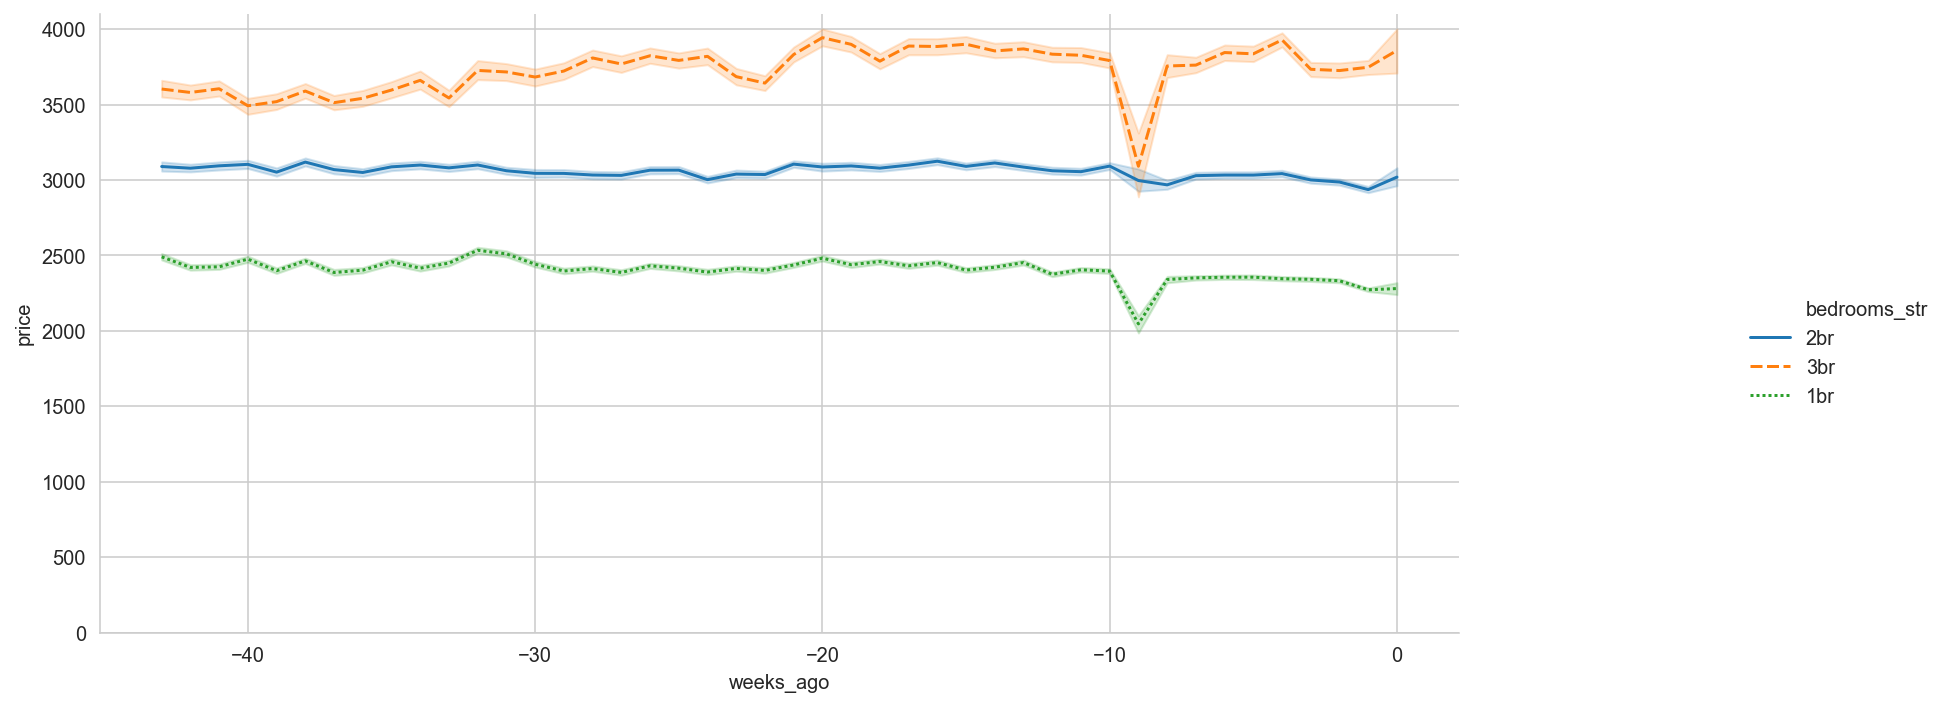

In [36]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

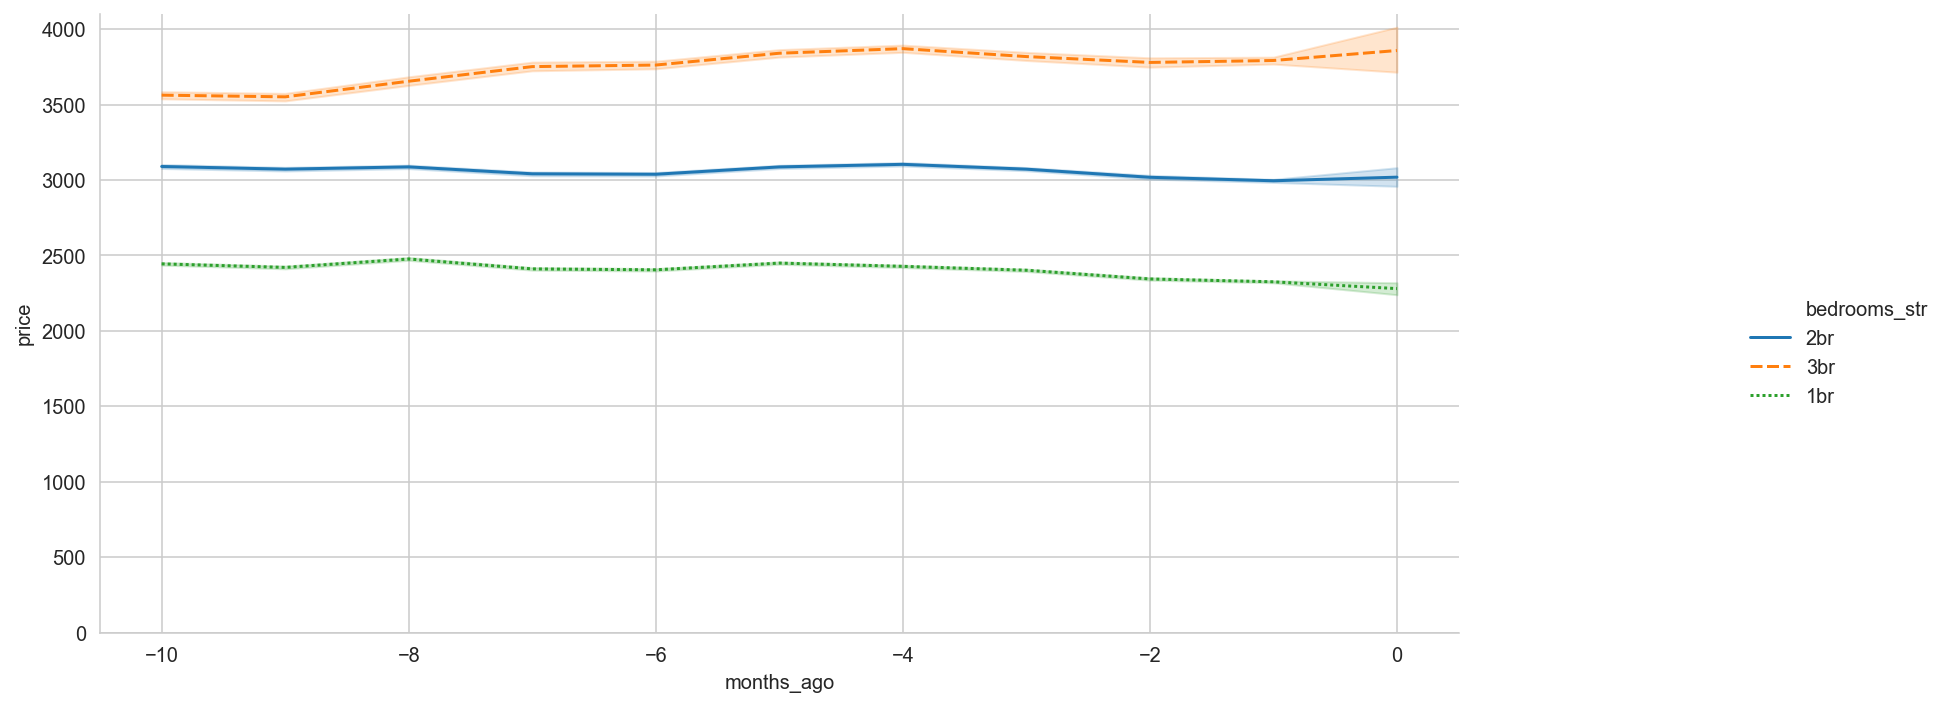

In [37]:
g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

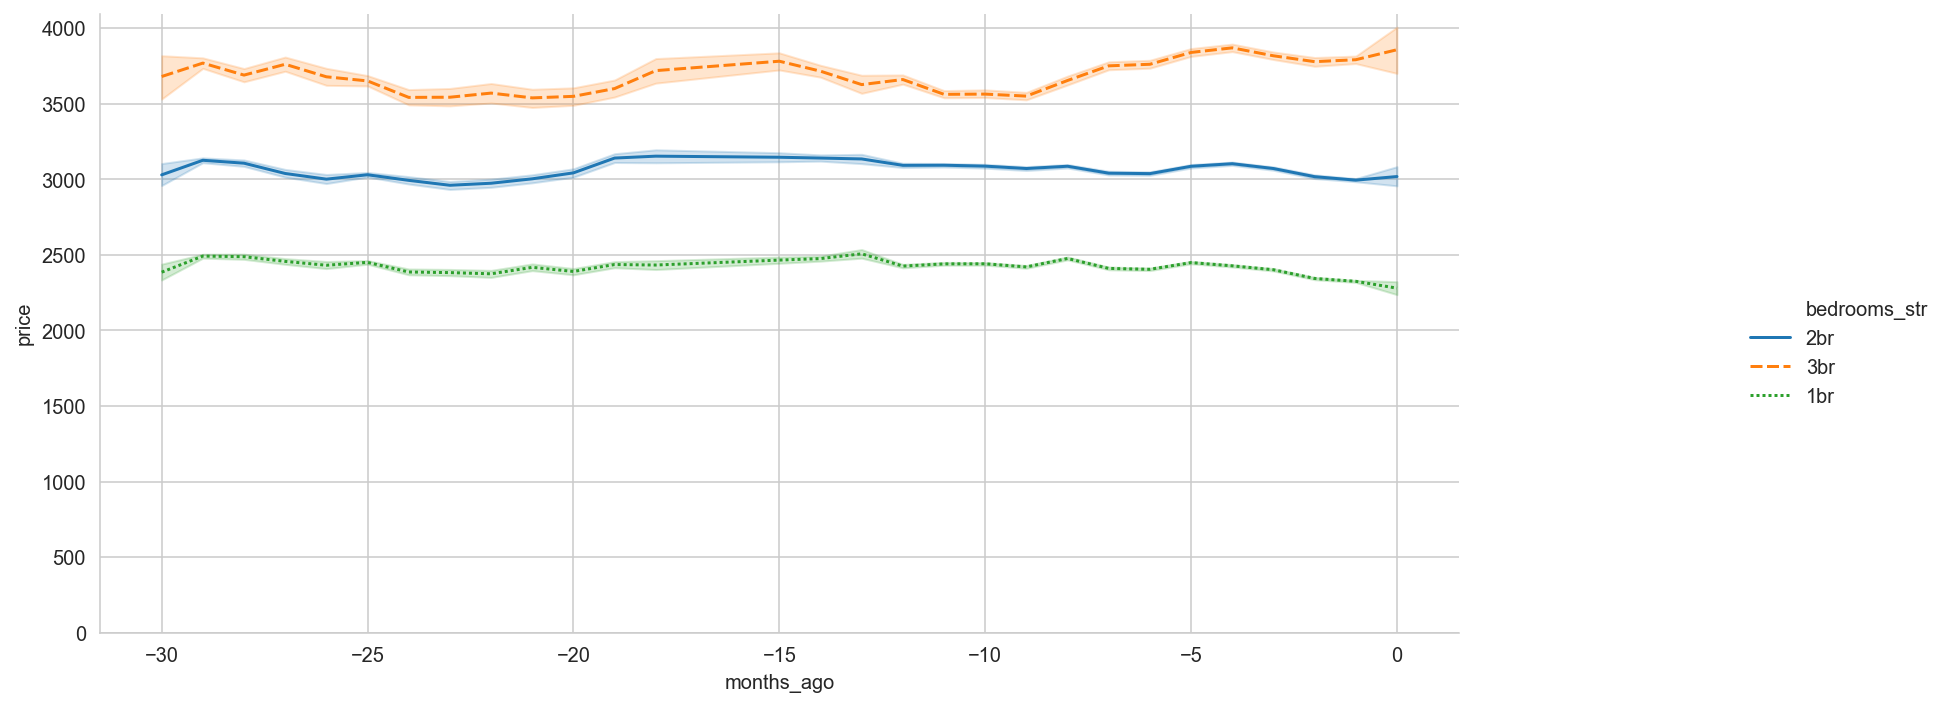

In [38]:
dag_data = pdf[(pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=dag_data);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

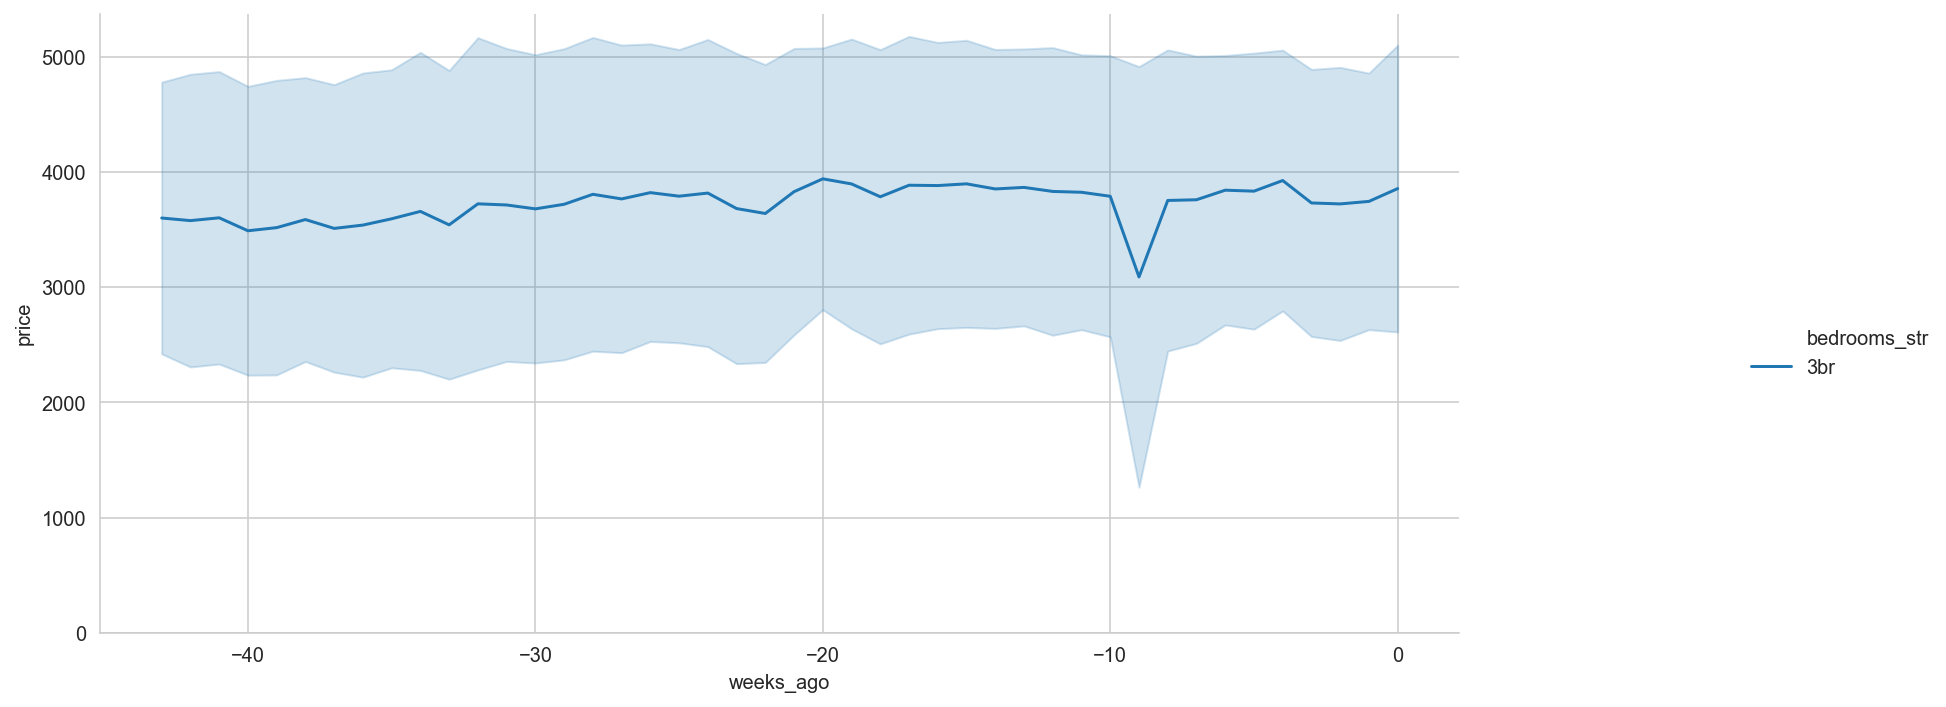

In [39]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="3br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

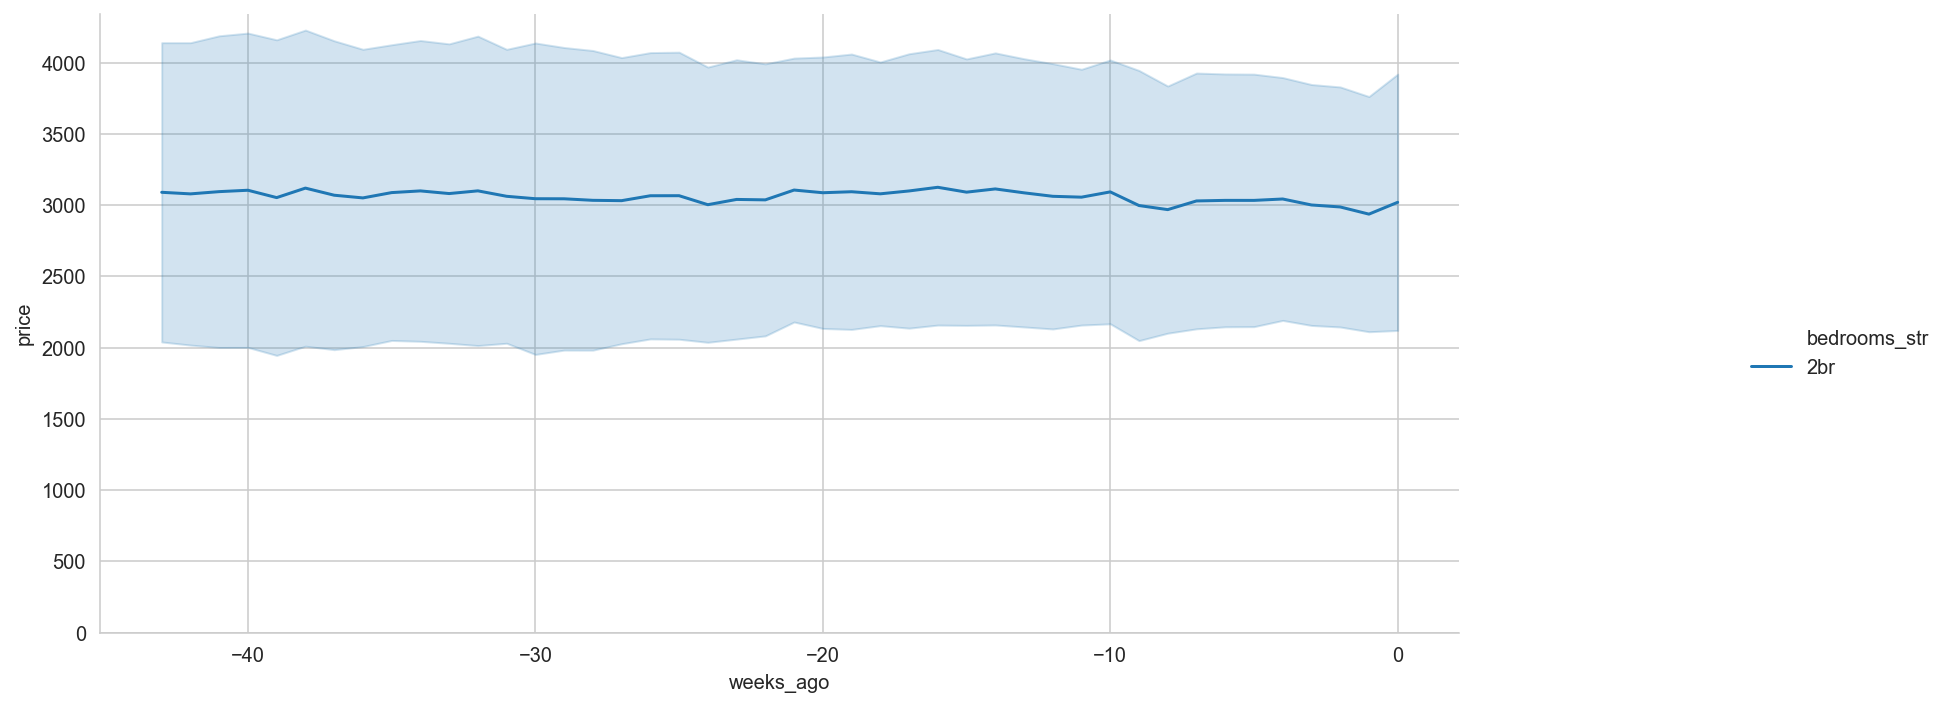

In [40]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="2br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

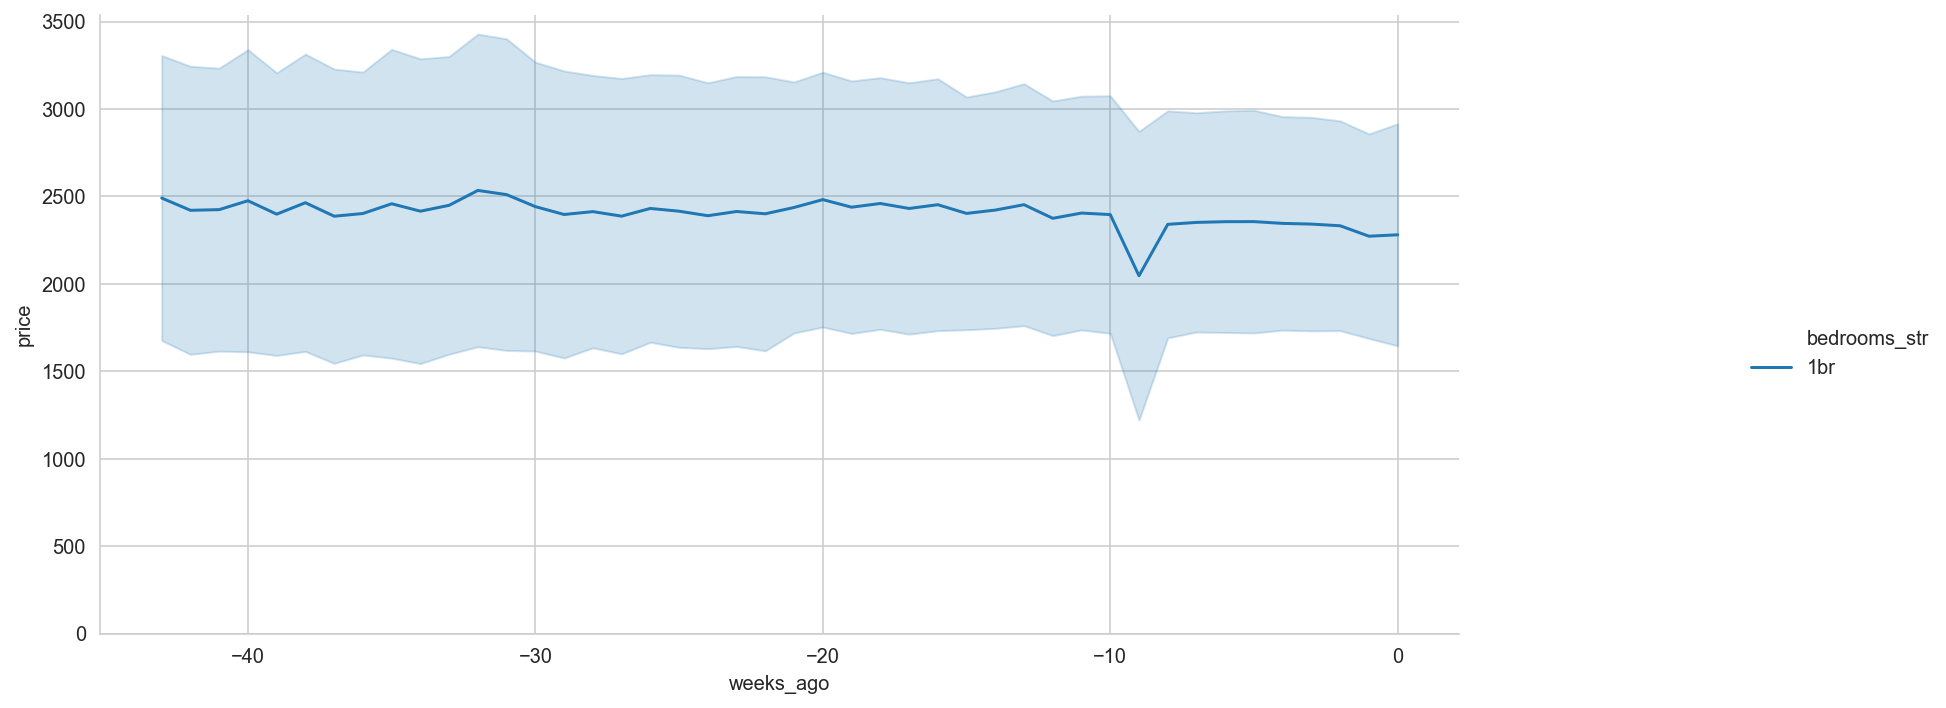

In [41]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="1br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

<AxesSubplot:xlabel='days_ago'>

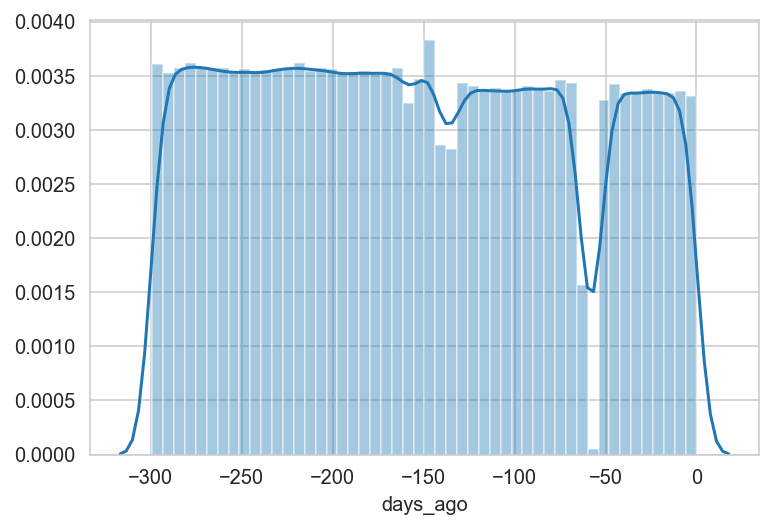

In [42]:
sns.distplot(acc["days_ago"])

<AxesSubplot:xlabel='weeks_ago'>

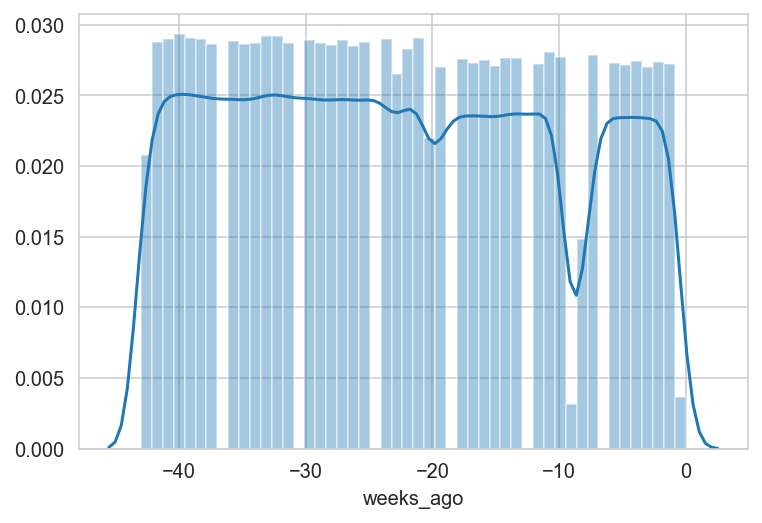

In [43]:
sns.distplot(acc["weeks_ago"])

<AxesSubplot:xlabel='months_ago'>

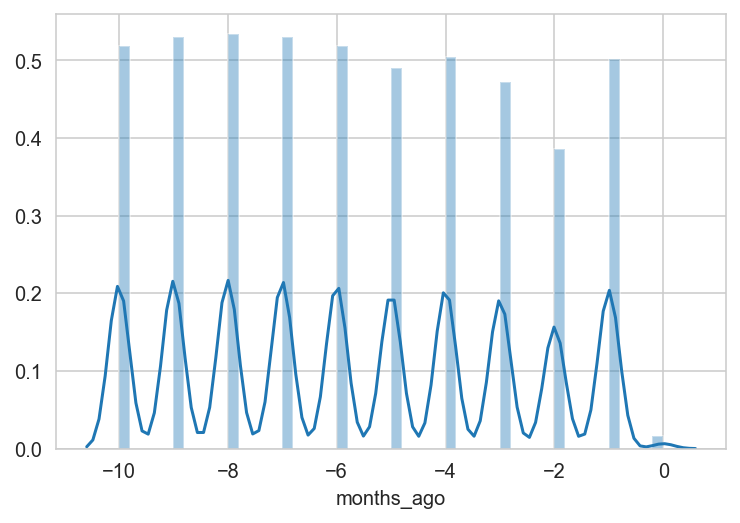

In [44]:
sns.distplot(acc["months_ago"])

In [45]:
acc["parsed_district"].describe()

count       651230
unique        2717
top       berkeley
freq         25926
Name: parsed_district, dtype: object

In [47]:
pdf["added"].min()

Decimal('1525493124369')

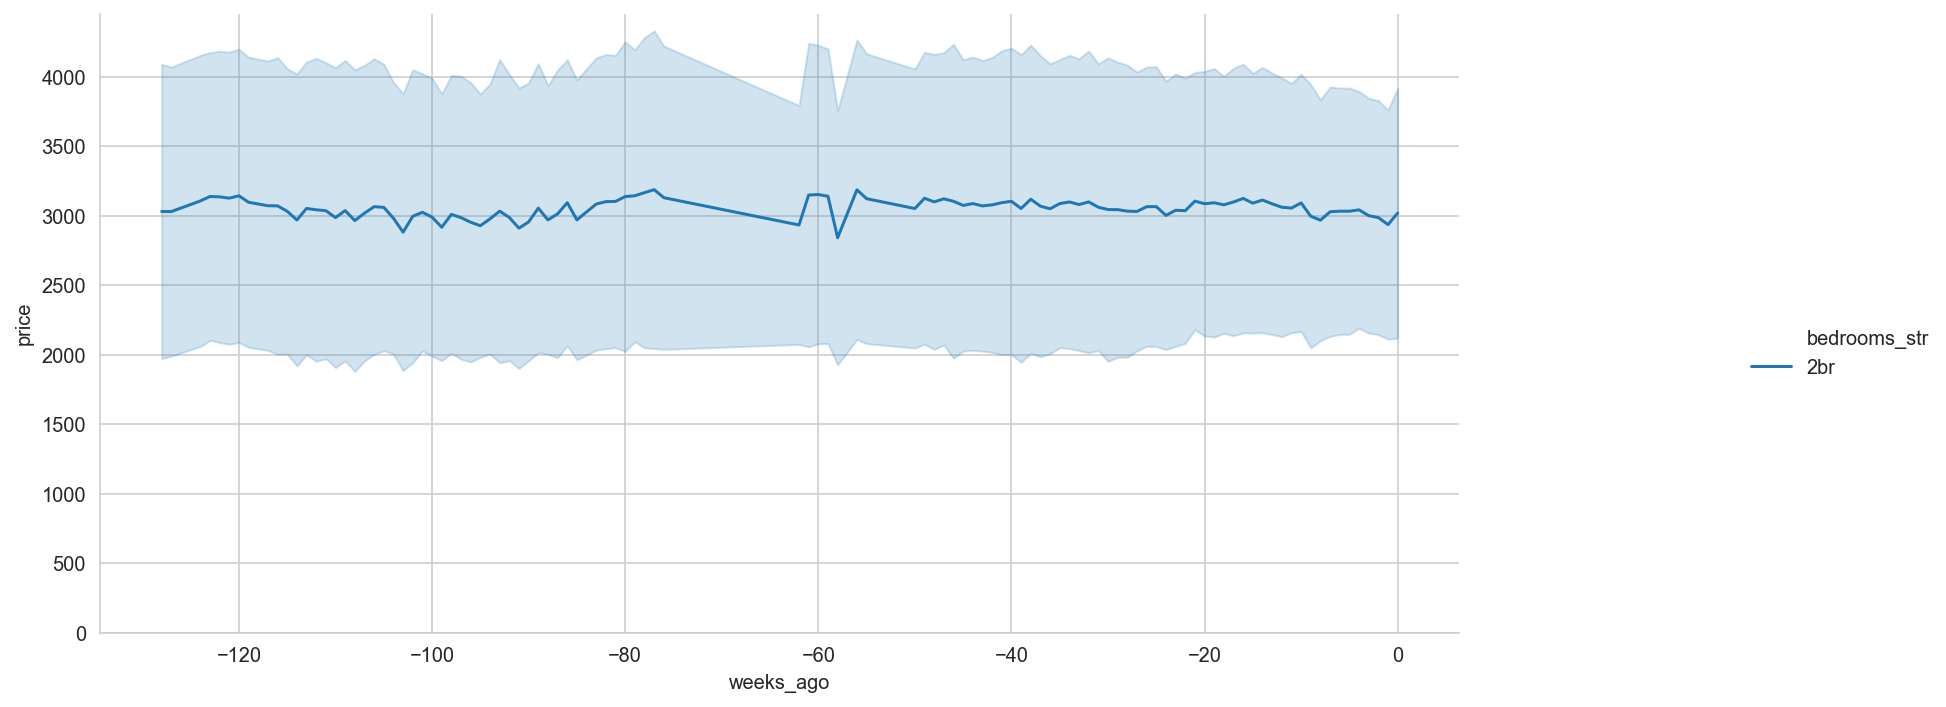

In [51]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=pdf[(pdf["bedrooms_str"]=="2br") & (pdf["price"] < 8000) ])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));